In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

### read in data arrays

In [2]:
# save LRG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz', ra_LRG=ra_LRG)
# print(ra_LRG.shape)
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz', dec_LRG=dec_LRG)
# print(dec_LRG.shape)
data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz', z_LRG=z_LRG)
# print(z_LRG.shape)
data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz', gmag_LRG=gmag_LRG)
# print(gmag_LRG.shape)
data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz', rmag_LRG=rmag_LRG)
# print(rmag_LRG.shape)
data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz', zmag_LRG=zmag_LRG)
# print(zmag_LRG.shape)
data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz', grcolor_LRG=grcolor_LRG)
# print(grcolor_LRG.shape)
data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz', rzcolor_LRG=rzcolor_LRG)
# print(rzcolor_LRG.shape)
data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)


In [3]:
# save BKG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz', ra_BKG=ra_BKG)
# print(ra_BKG.shape)
data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz', dec_BKG=dec_BKG)
# print(dec_BKG.shape)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz', gmag_BKG=gmag_BKG)
# print(gmag_BKG.shape)
data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz', rmag_BKG=rmag_BKG)
# print(rmag_BKG.shape)
data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz', zmag_BKG=zmag_BKG)
# print(zmag_BKG.shape)
data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz', grcolor_BKG=grcolor_BKG)
# print(grcolor_BKG.shape)
data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz', rzcolor_BKG=rzcolor_BKG)
# print(rzcolor_BKG.shape)
data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)


In [5]:
# save combined LRG and BKG lists

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# print(ra.shape)
data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
print(ra_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# print(dec.shape)
data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
print(dec_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# print(gmag.shape)
data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
print(gmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# print(rmag.shape)
data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
print(rmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# print(zmag.shape)
data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
print(zmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# print(grcolor.shape)
data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
print(grcolor_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# print(rzcolor.shape)
data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
print(rzcolor_total.shape)

# print(rzcolor_total[0:10])
# print(rzcolor_total[0])
# print(rzcolor_total[5])

(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)


### begin analysis

In [6]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG)

print("end cosmoCalc")


end cosmoCalc


In [7]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

# rzinit = -1.8027077
# rzfin = 10.44729232788086
# rz_interval = 0.5
# rz_num = (rzfin-rzinit)/rz_interval
# rz_edges, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# print(len(rz_edges))

# grinit = -6.5846786
# grfin = 10.56532135009765
# gr_interval = 0.5
# gr_num = (grfin-grinit)/gr_interval
# gr_edges, step = np.linspace(grinit, grfin, num=int(gr_num), retstep=True)
# print(len(gr_edges))

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((rzcolor_total, grcolor_total, zmag_total), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


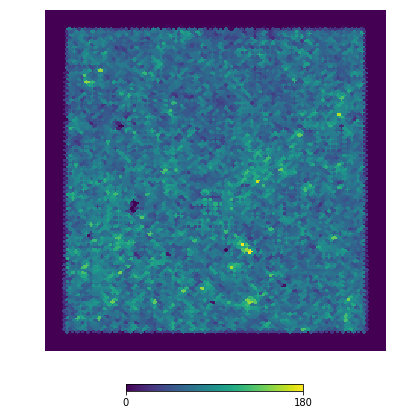

length phi:  519348


In [8]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total)):
    theta.append(np.radians(90. - dec_total[i]))
    phi.append(np.radians(ra_total[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [9]:
distance = 0.5 # must be in Mpc

# distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, raLRG, decLRG, raBKG, decBKG, zmagLRG, zmagBKG, rzcolorLRG, rzcolorBKG, grcolorLRG, grcolorBKG, nouse_edges)

print('end nearNeighbor')

end nearNeighbor


In [10]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

# rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
# grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])
# zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, raLRG, decLRG, pixnums, zmag_total, rzcolor_total, grcolor_total, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


In [11]:
Nbkg_arr = np.array(Nbkg)

In [12]:
Nsat = np.array(near) - np.array(Nbkg)

In [13]:
np.savez('/Users/mtownsend/Desktop/data_Nsat.npz', Nsat=Nsat)

print(Nsat.shape)
data_Nsat = np.load('/Users/mtownsend/Desktop/data_Nsat.npz')
Nsat_data = data_Nsat['Nsat']
print(Nsat_data.shape)

(1823, 49, 49, 49)
(1823, 49, 49, 49)


In [16]:
Nsat_bin1 = Nsat_data[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
Nsat_bin2 = Nsat_data[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
Nsat_bin3 = Nsat_data[np.where((zLRG >= 0.5) & (zLRG < 0.65))]

print(len(Nsat_bin1))
print(len(Nsat_bin2))
print(len(Nsat_bin3))
print(len(Nsat_bin1) + len(Nsat_bin2) + len(Nsat_bin3))

309
617
897
1823


In [18]:
# read in selection matrices

data_smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-v2.npz')
smatrix_low = data_smatrix_low['smatrix']
low_smatrix35 = smatrix_low[0]

data_smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-v2.npz')
smatrix_mid = data_smatrix_mid['smatrix']
mid_smatrix35 = smatrix_mid[0]
mid_smatrix05 = smatrix_mid[1]

data_smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-v2.npz')
smatrix_high = data_smatrix_high['smatrix']
high_smatrix35 = smatrix_high[0]
high_smatrix05 = smatrix_high[1]
high_smatrix65 = smatrix_high[2]


In [19]:
# apply masks

# lowz
masked_Nsat_low35 = Nsat_bin1 * low_smatrix35

# midz
masked_Nsat_mid35 = Nsat_bin1 * mid_smatrix35
masked_Nsat_mid05 = Nsat_bin2 * mid_smatrix05

# highz
masked_Nsat_high35 = Nsat_bin1 * high_smatrix35
masked_Nsat_high05 = Nsat_bin2 * high_smatrix05
masked_Nsat_high65 = Nsat_bin3 * high_smatrix65

mean number of satellites is 1.0967366932794047
median number of satellites is 0.594384080084225
standard deviation of satellites is 2.438466395557542
standard error is 0.13894451805759647


0.594384080084225

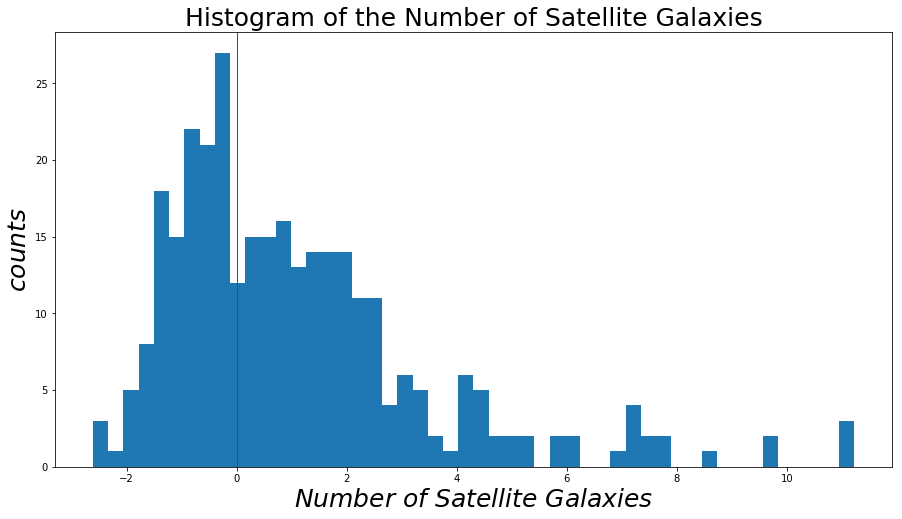

In [24]:
totalNsat(masked_Nsat_low35)

# totalNsat(Nsat_bin1)

mean number of satellites is 0.23054495838306058
median number of satellites is -0.2414849514362825
standard deviation of satellites is 0.888657413186343
standard error is 0.05063595554092316


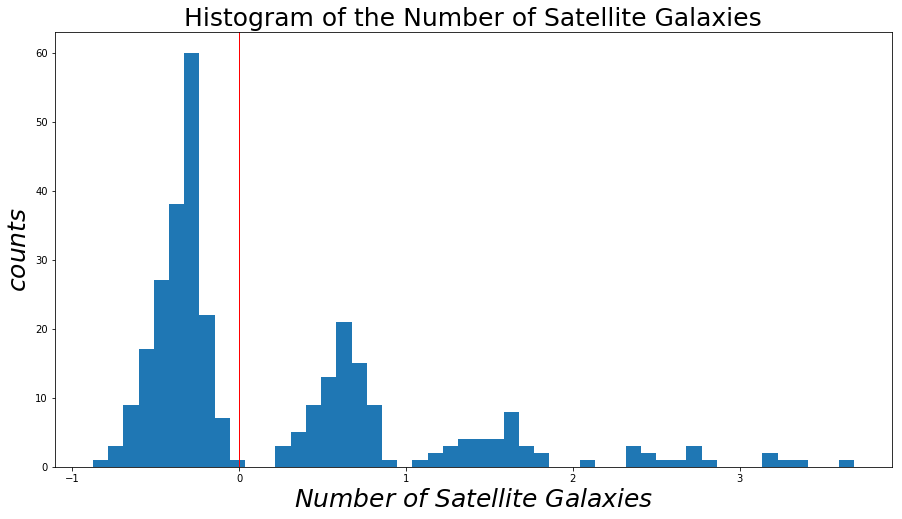

mean number of satellites is 0.1513361821867824
median number of satellites is -0.05104582516144496
standard deviation of satellites is 1.3129925061318088
standard error is 0.05290197565171232


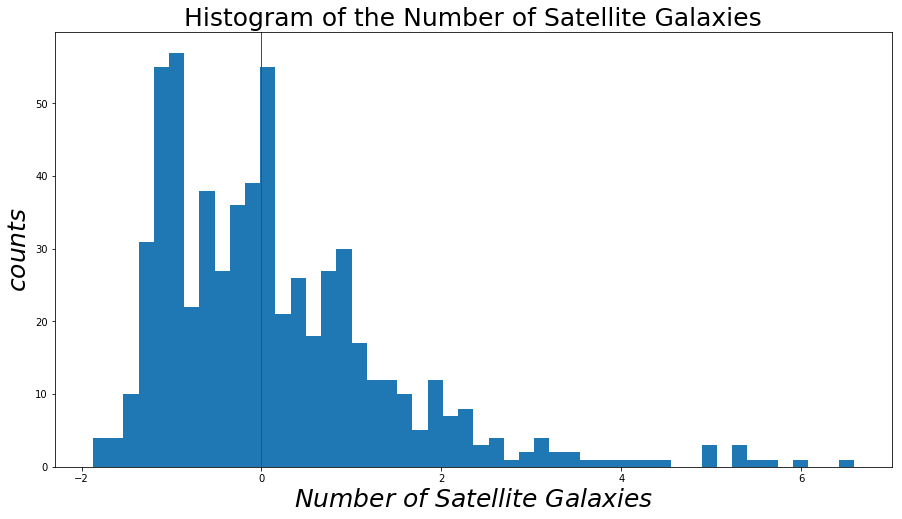

In [25]:
totalNsat(masked_Nsat_mid35)
plt.show()

totalNsat(masked_Nsat_mid05)
plt.show()


mean number of satellites is 0.12911063226635802
median number of satellites is -0.08636153356568713
standard deviation of satellites is 0.5764169381016836
standard error is 0.03284440327358365


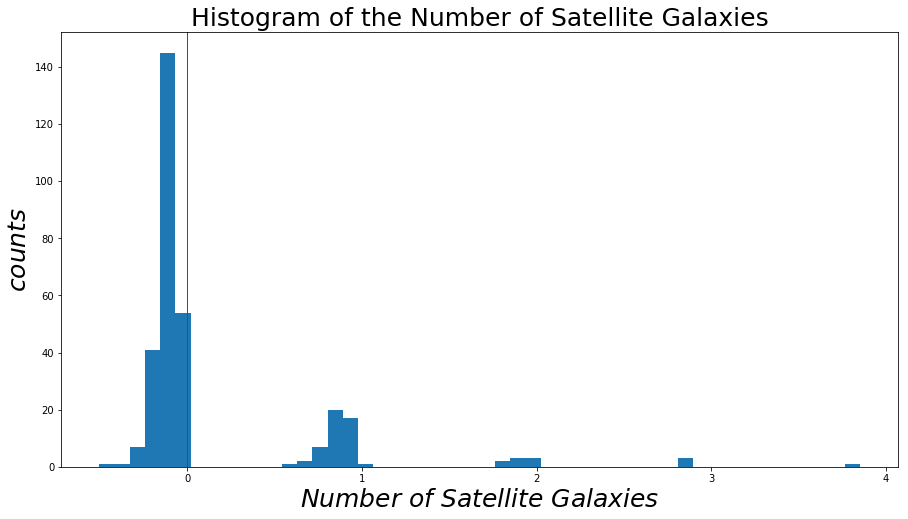

mean number of satellites is 0.012967084460086556
median number of satellites is -0.2950854874576667
standard deviation of satellites is 0.6779964661759942
standard error is 0.027317256098633655


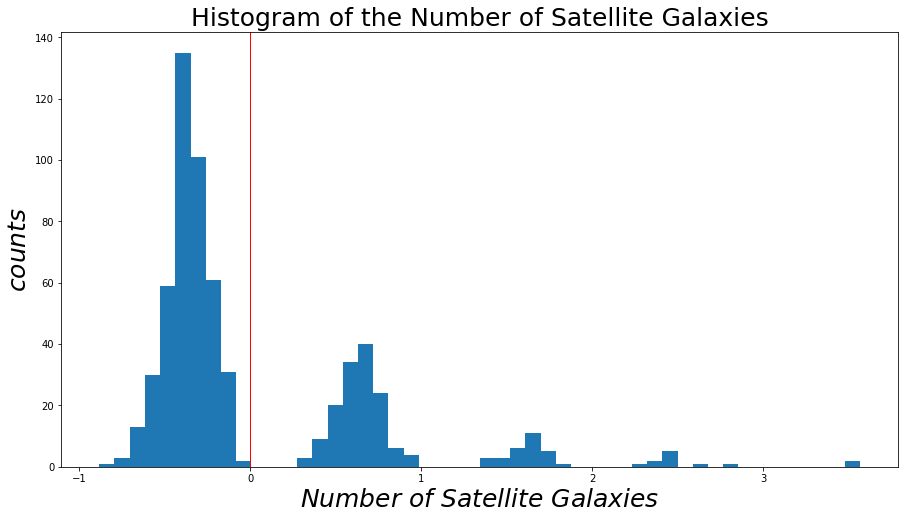

mean number of satellites is 0.1875853416490524
median number of satellites is -0.14356454039243455
standard deviation of satellites is 1.3751192266422576
standard error is 0.04593950903625779


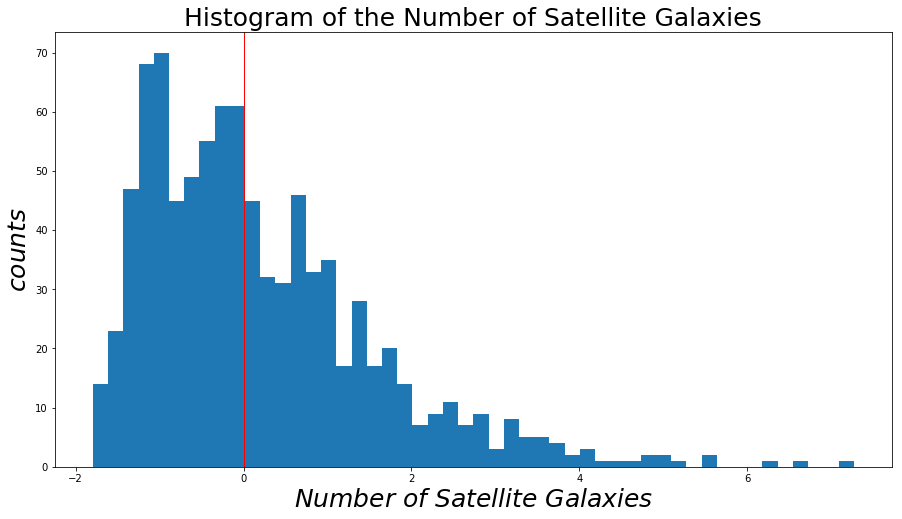

In [26]:
totalNsat(masked_Nsat_high35)
plt.show()

totalNsat(masked_Nsat_high05)
plt.show()

totalNsat(masked_Nsat_high65)
plt.show()